In [2]:
from manim import *
import math
import numpy as np
from manim_slides import *

####
# Instructions for using manim-slides/manim in Jupyter and then how to render final product:
#1. Make a function in each scene callsed:
# DELAY = 0.1
# def pause(self):
#   self.wait(DELAY)
#   self.next_slide()
#2. Put self.pause() after every animation where you want to pause
#3. Decide to use either manim-slides or manim jupyter magic for the notebook:
# a. For manim-slides make each class MyScene(Slide) and then use:
#    %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true data_uri=false
#    Controls: Toggle Full Screen (F), Quit (Q), Play/Pause (Space), Next (Right), Previous (Left), Reverse (V), Replay (R), Hide/Show Mouse (H).
#    See all slides (Esc)
#    custom cli commands other than controls=false can be found at. https://manim-slides.eertmans.be/latest/reference/customize_html.html
# b. For regular manim video use class MyScene(Scene) and then use:
#    %%manim -ql -v CRITICAL MySlide
#    -ql means quality low, this is useful for faster rendering during development
#    Can also use: --progress_bar [display|leave|none] for the progress bar
#.   -v WARNING sets the verboisty level to "WARNING"
#.  Muse comment out #self.next_slide() in the pause function.
#4. Use self.next_section to skip animations (for faster rendering)
#   In regular manim (not slides)
#   Use:
#    self.next_section(skip_animations=True)
#    ...code you want to skip the animations for here...
#    self.next_section() 
#    ...code you are wokring on here...
#
# When ready to render do:
# 1. Comment out all the jupyter magic and all the next_section(skip_animations=True)
# 2. Save as all_scenes.py file with all the scenes
# 3. In terminal run:
# manim -qh all_scenes.py Scene1 Scene2 Scene3
# manim-slides present Scene1 Scene2 Scene3
#
# Manim juptyer magic commands:
# %%manim -ql -v WARNING MyScene
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true


/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import os
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]

In [4]:
import jax

In [5]:
## Global Variables and Stuff ##
#config.media_embed = True
DELAY = 0.1

# latex preamble
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\E}{\mathbb{E}}
    \newcommand{\P}{\mathbb{P}}
    \newcommand{\vect}[1]{\mathbf{#1}}
""") 

# tex color dictionary
E_color = GREY_B
n_color = BLUE_C
T_color = ORANGE
F_color = PURPLE_A
k_color = GREEN
x_color = TEAL
f_color = r"#FFB347"
t2cD = {
    r"\mathbb{E}": E_color,
    r"\mathbb{P}": E_color,
    r"\big(": E_color,
    r"\big)": E_color,
    "n ": n_color,
    "T ": T_color,
    "F_": F_color,
    "k ": k_color,
    "x ": x_color,
    "x{}": x_color,
    "1{}": x_color,
    " f" : f_color
}

# font sizes
my_fs = 75

#other colors

house_color = WHITE
dot_color = WHITE
edge_color = BLUE

In [6]:
# Draw the spider's body
def my_spider(eye_angle = 0.1, my_scale = 0.5):
    body = Circle(radius=0.7, color=WHITE, fill_opacity=1).shift(UP * 0.5)

    # Draw the spider's eyes
    eye1 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + LEFT * 0.3)
    eye2 = Circle(radius=0.25, color=BLACK, fill_opacity=1).shift(UP * 0.7 + RIGHT * 0.3)


    # Add eyeballs to the eyes

    #eye_angle = 0.1
    eye_x = np.cos(eye_angle)*0.1
    eye_y = np.sin(eye_angle)*0.1
    eyeball1 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + LEFT * 0.3)
    eyeball2 = Circle(radius=0.1, color=WHITE, fill_opacity=1).shift(UP * 0.7 + RIGHT*eye_x + UP*eye_y + RIGHT * 0.3)

    # Draw the spider's legs
    legs = VGroup()

    # Define rotation and positions for each leg
    leg_positions = [
        (-1,-1.5, 1), (-1,-1.5, 0.2),  # Left front legs
        (-1,-1.5, -0.5), (-1,-1.5, -1.2), # Left back legs
        (1,1.5, 1), (1,1.5, 0.2),    # Right front legs
        (1,1.5, -0.5), (1,1.5, -1.2)  # Right back legs
    ]

    # Add legs with two segments to the group
    for rot, x, y in leg_positions:
        theta = rot*0.2 

        frac = 0.8
        joint = [(x*np.cos(theta)-y*np.sin(theta)) * frac, (x*np.sin(theta)+y*np.cos(theta)) * frac, 0]  # Position of the joint between segments

        my_origin = [x*0.4, y*0.4,0]
        
        leg_width = my_scale*10
        leg_segment1 = Line(start=my_origin, end=joint, color=WHITE, stroke_width=leg_width ,path_arc=rot*0.9)
        frac = 0.78
        joint = [(x*np.cos(theta)-y*np.sin(theta)) * frac, (x*np.sin(theta)+y*np.cos(theta)) * frac, 0]  # Position of the joint between segments

        leg_segment2 = Line(start=joint, end=[x, y, 0], color=WHITE, stroke_width=leg_width ,path_arc=rot*0.75)
        leg_segment1.shift(UP * 0.5)  # Align first segment with the body
        leg_segment2.shift(UP * 0.5)  # Align second segment with the body
        legs.add(leg_segment1, leg_segment2)

    # Add everything to the scene eyeball1, eyeball2,

    return VGroup( body, eye1, eye2, legs, eyeball1, eyeball2).scale(my_scale).set_z_index(2)



In [7]:
def get_angle(mobject1, mobject2):
    # Get direction vectors of the two Mobjects
    delta_x = mobject2.get_x() - mobject1.get_x()
    delta_y = mobject2.get_y() - mobject1.get_y()

    # Calculate the angle between the two vectors
    return math.atan2(delta_y, delta_x)
    

In [8]:
## Global Variables to Store Final Mobjects Passed Between Scenes ##
FINAL_MOBJECTS = None
FINAL_MOBJECTS_2 = None

Manim Community v0.19.0

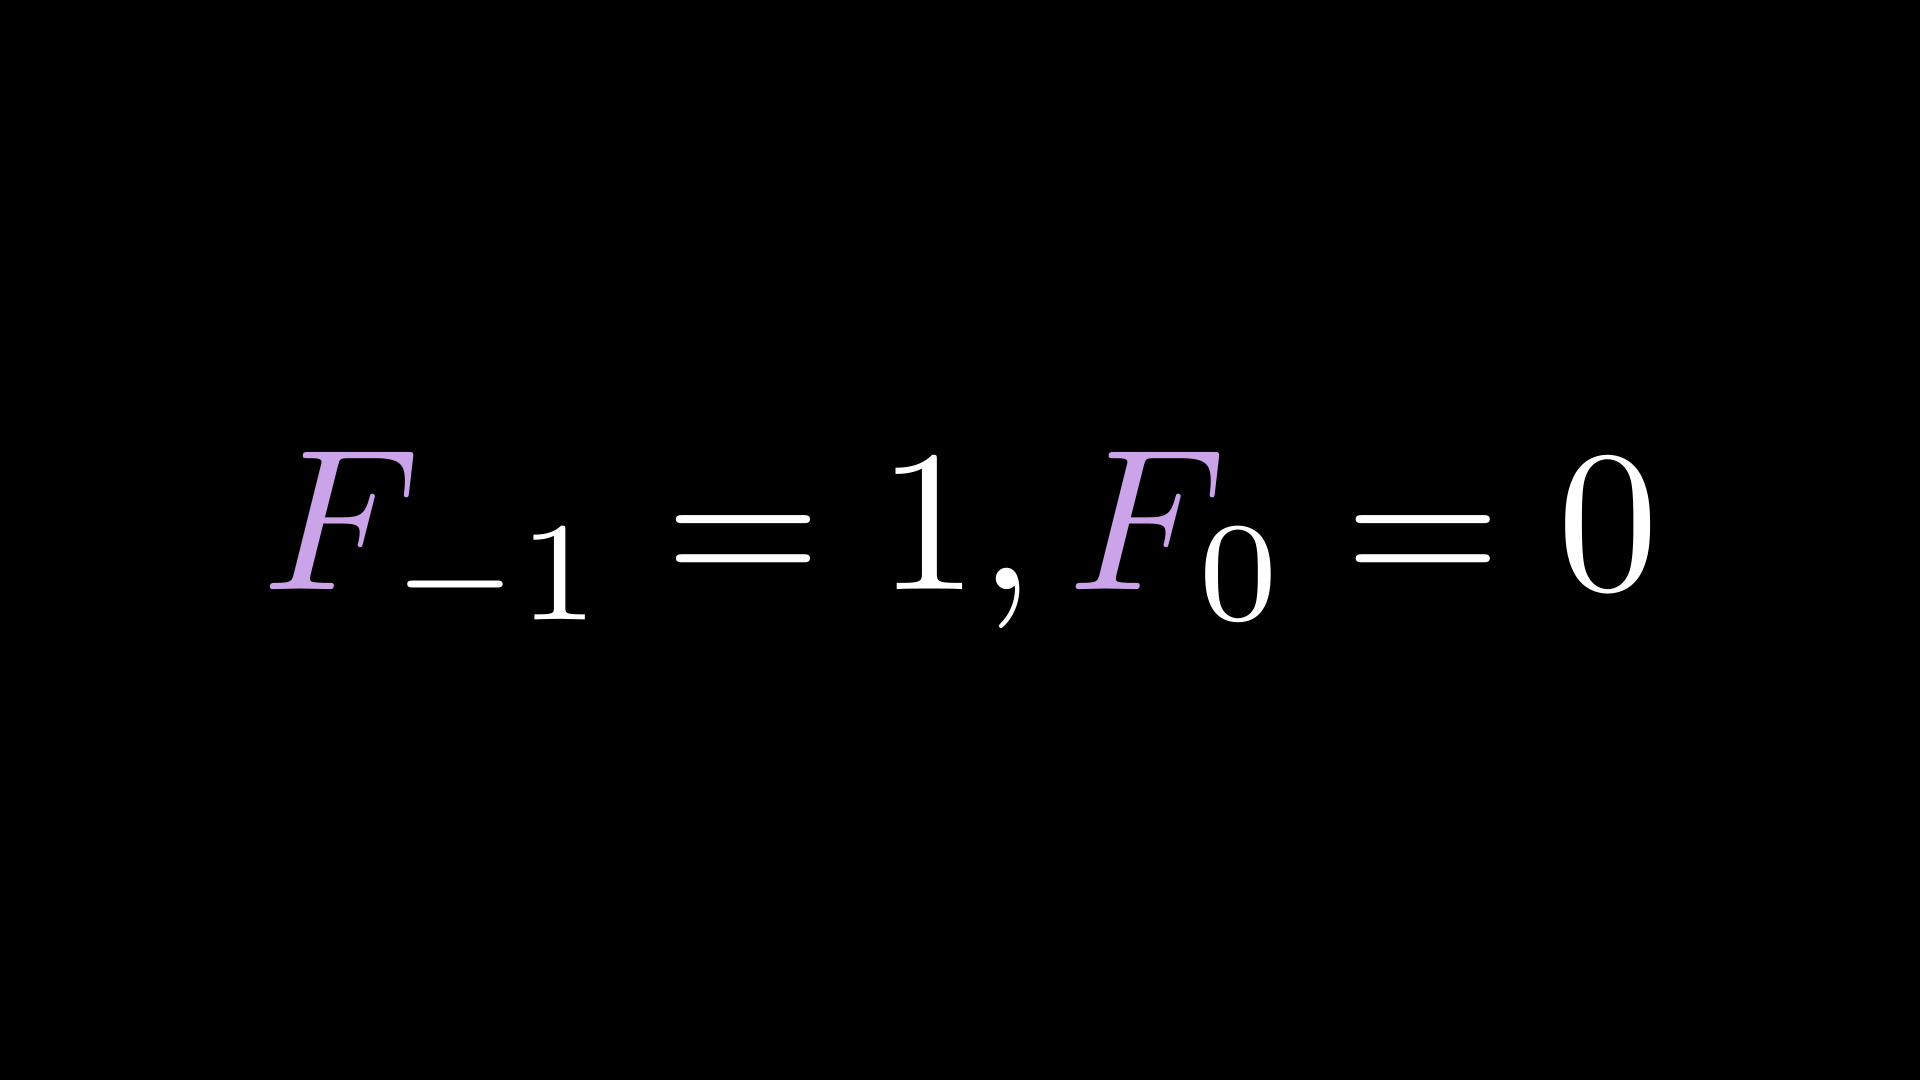

In [9]:
%%manim -qh -v WARNING MyScene

class MyScene(Scene):
    def construct(self):
        #t = MathTex("F_{n } = F_{n - 1}  + F_{n - 2}",tex_to_color_map=t2cD).scale(3)
        t2 = MathTex("F_{-1} = 1, F_{0} = 0",tex_to_color_map=t2cD).scale(3)
        g = VGroup(t2).arrange(DOWN,buff=0.7)
        self.add(g)


In [19]:
%%manim -ql -v WARNING Spider
#%%manim_slides -ql -v WARNING Spider --manim-slides controls=false
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class Spider(Scene):  # Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
        #self.next_section(skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        ###
        #self.next_section() #comment out for manim-slied
        
        def my_house(x=0,y=0,scale=0.075):
            new_house = Polygon([0, 0, 0],  # Bottom-left base
                                [2.2, 0, 0],  # Bottom-left door
                                [2.2, 2.8, 0],  # Top-left door
                                [3.8, 2.8, 0],  # Top-right door
                                [3.8, 0, 0],  # Bottom-right door
                                [6, 0, 0],  # Bottom-right base
                                [6, 4, 0],  # Top-right base
                                [6.5, 4, 0],   # Rightmost corner roof
                                [3, 7, 0],     # Apex roof
                                [-0.5, 4, 0],  # Leftmost corner roof
                                [0, 4, 0],  # Top-left base
                               color=WHITE, fill_color=WHITE, fill_opacity=1.0)
            new_house.set_x(x)
            new_house.set_y(y)
            new_house.scale(scale)
            return new_house
        
        
        
        pentagon = RegularPolygon(n=5).scale(2.0)
        pentagon.shift(0.1*DOWN) #to_edge(RIGHT,buff=1.0)
        #self.add(pentagon)
        # Get the vertices of the polygon
        vertices = pentagon.get_vertices()
        edges = VGroup(*[Line(vertices[i], vertices[(i + 1) % 5], color=edge_color) for i in range(5)])


        # Add the polygon to the scene
        

        # Mark the vertices
        dots = VGroup(*[Dot(point=vertex, color=dot_color, radius=0.1) for vertex in vertices])
       
        #house_size = 2.0 
        #house = VGroup( Polygon([house_size/2,0,0],[0,house_size/2,0],[-house_size/2,0,0])  )
        
        #house += Square(side_length=house[0].width*0.75).next_to(house[0],DOWN,buff=0.0)
        #self.add(house)
        
        #house.move_to(dots[0])

        # Optionally, add labels to the vertices
        for i, vertex in enumerate(vertices):
            label = Text(f"{i+1}").scale(0.5).next_to(vertex, UP * 0.2)
            #self.add(label)

        spider = my_spider(eye_angle = 90*DEGREES)
        
        spider.move_to(dots[0])

        #self.add(spider)
        
        
        #self.add(edges)
        #self.add(dots[1:])
        
        
        #home = MathTex(r"\text{HOME}",font_size=50)
        house = my_house()
        house.set_z_index(1)
        house.move_to(dots[0])
        #self.add(house)
        #home.next_to(spider,UP)
        #self.add(home)

        
        q_size = 60
        eq_size = 60
        hint_size = 40
        line1 = MathTex(r'\text{A spider goes for a random walk on a }', 'k ', r'\text{-agon.}',font_size=q_size)
        line1[1].set_color(k_color)
        line2 = MathTex( r'T', '=', r'\text{ The number of steps until first return home.}',font_size=q_size)
        line2[0].set_color(T_color)

        probs_list = MathTex(r'{ 1 ', r' \over 2 } ', '+',
                            r'{ 0 ', r' \over 4 }', '+',
                            r' { 1 ', r' \over 8 } ', '+',
                            r'{ 1 ', r' \over 16 } ', '+',
                            r'{ 2 ', r' \over 32 } ', '+',
                            r'{ 3 ', r' \over 64 } ', '+',
                            r'{ 5 ', r' \over 128 } ', '+',
                            r'{ 8 ', r' \over 256 } ', r' \ldots ',
                        font_size=1.5*hint_size, tex_to_color_map=t2cD)

        probs_list2 = MathTex(r'{ 1 ', r' \over 2 } ', ',',
                            r'{ 0 ', r' \over 4 }', ',',
                            r' { 1 ', r' \over 8 } ', ',',
                            r'{ 1 ', r' \over 16 } ', ',',
                            r'{ 2 ', r' \over 32 } ', ',',
                            r'{ 3 ', r' \over 64 } ', ',',
                            r'{ 5 ', r' \over 128 } ', ',',
                            r'{ 8 ', r' \over 256 } ', r' \ldots ',
                        font_size=1.5*hint_size, tex_to_color_map=t2cD)

        probs_list.set_color_by_tex('+',BLACK)
        eq_one = MathTex('=','1',font_size=1.5*hint_size, tex_to_color_map=t2cD )
        
       

        P_exact_hint = MathTex(r'\text{Exactly } n \text{ steps:}',
                        font_size=hint_size, tex_to_color_map=t2cD)
        P_exact = MathTex(r'\mathbb{P}\big(T = n \big) = { F_{ n - 3}', r' \over 2^{ n -1 } }',
                        font_size=eq_size, tex_to_color_map=t2cD) #,
                        #tex_template=texPre) #, tex_to_color_map=t2cD)
        sum_eqn = MathTex(r'\sum_{n=2}^\infty n \mathbb{P}\big( T = n \big)', r'=', 'k ',
                        font_size=eq_size, tex_to_color_map=t2cD) #,
        sum_eqn[-1].set_color(k_color)
        sum_eqn2 = MathTex(r'\sum_{n=2}^\infty n { F_{ n - 3}', r' \over 2^{ n -1 } }', r'=', '5',
                        font_size=eq_size, tex_to_color_map=t2cD) #,
        sum_eqn2[-1].set_color(k_color)


        E_hint = MathTex(r'\text{Average number of steps:} ',
                        font_size=0.8*hint_size, tex_to_color_map=t2cD)

        E_eq_size = 80
        E_eqn = MathTex(r'\mathbb{E} \big[T \big]', r'=', r'k ',
                        font_size=E_eq_size, tex_to_color_map=t2cD)

        Q_mark = MathTex(r'???',
                        font_size=E_eq_size, tex_to_color_map=t2cD)

        E_eqn[-1].set_color(BLACK)
        
        top_buff = 0.5
        line1.to_edge(UP,buff=top_buff)
        line2.to_edge(UP,buff=top_buff)
        #line2.align_to(line1,LEFT)
        
        sum_eqn.set_y(spider.get_y())
        sum_eqn.to_edge(RIGHT)
        
        E_eqn.set_y(spider.get_y())
        #E_eqn.next_to(spider,RIGHT,buff=0.5)
        E_eqn.to_edge(LEFT)
        Q_mark.next_to(E_eqn[-2],RIGHT)
        
        #P_exact_hint.next_to(P_exact,UP,buff=0.05).align_to(P_exact,LEFT)
        E_hint.next_to(E_eqn,UP,buff=0.2).align_to(E_eqn,LEFT)

        #self.play(LaggedStart( [FadeIn(probs_list[i],shift=RIGHT) for i in range(len(probs_list))],lag_ratio=0.1))
        #self.pause()
        


        #probs_list.generate_target()
        #probs_list.target.set_color_by_tex("+", WHITE)
        #my_group = VGroup(probs_list.target, eq_one).arrange(RIGHT)
        #self.play(MoveToTarget(probs_list),FadeIn(eq_one,shift=RIGHT))
        #self.pause()
        
        #probs_list.generate_target()
        #probs_list.target.set_color_by_tex("+", BLACK)
        probs_list2.next_to(pentagon,DOWN,buff=0.7)
        #self.play(TransformMatchingTex(probs_list,probs_list2),FadeOut(eq_one))
        #self.pause()

        k_is = MathTex(r'k = \text{Number of sides}',font_size=0.8*hint_size, tex_to_color_map=t2cD)
        #k_is.next_to(pentagon,DOWN,buff=0.7)
        k_is.to_corner(UR,buff=0.1)

        #self.play(LaggedStart( [Write(line1),FadeIn(spider,scale=0.1),FadeIn(house,scale=0.1),FadeIn(dots[1:],edges,scale=0.1), FadeIn(k_is,shift=DOWN)] ,lag_ratio=0.1))
        self.pause()
        self.add(line1,spider,house,dots[1:],edges)
        self.pause()

        comment = ImageMobject("youtube_comment2.png").scale(0.5)
        comment.set_z_index(-1)
        comment.next_to(line1,DOWN)
        comment.to_edge(LEFT)

        self.play(ReplacementTransform(line1[1].copy(),k_is))
        self.pause()

        self.play(FadeIn(comment))
        self.pause()

        
        #self.play(FadeIn(edges),FadeIn(dots[1:]),FadeIn(house))
        #self.pause()

        
        #self.play(Write(line1))
        
        
        spider_pos = 0
        spider_pos_post = 0
        np.random.seed(3)
        for t in range(8):
            choice = np.random.choice([-1,+1])
            #left_step = ( spider_pos - 1 ) % 5
            #right_step = ( spider_pos + 1 ) % 5
            #spider_pos_post = np.random.choice([left_step,right_step])
            #while spider_pos_post == 0:
            #    spider_pos_post = ( spider_pos + np.random.choice([-1,1]) ) % 5
            
            
            
            print(spider_pos_post)
            
            look_length = 1.0
            look_num = 2
            for spider_target in [-1,+1]*look_num:
                spider_pos_post = ( spider_pos + choice*spider_target ) % 5
                spider.generate_target()
                spider.target = my_spider(eye_angle = get_angle(dots[spider_pos],dots[spider_pos_post]))

                spider.target.move_to(dots[spider_pos]) #move just the eyes!
                self.play(MoveToTarget(spider),run_time=look_length/(2.0*look_num))
                
            spider_pos_post = ( spider_pos + choice ) % 5
                
            spider.target.move_to(dots[spider_pos_post])
            anim_group = [MoveToTarget(spider)]
            if t==2:
                anim_group.append(LaggedStart(FadeOut(line1,shift=RIGHT),Write(line2),lag_ratio=0.5))
                #anim_group.append()

        

            if t==5:
                
                anim_group.append(LaggedStart( FadeOut(comment,shift=DOWN), Write(E_hint), Write(E_eqn[:-1]), Write(Q_mark), lag_ratio=0.5))
                
                #anim_group.append(FadeIn(probs_list2))
                #
            #if t==6:
                #anim_group.append(E_eqn[-1].animate.set_color(k_color))
                #anim_group.append(FadeOut(Q_mark))
                #E_eqn[-1].set_color(k_color)
            #if t==7:

                #anim_group.append(ReplacementTransform(probs_list2.copy(), VGroup(E_eqn, Q_mark, E_hint)))
                #anim_group.append()

            self.play(anim_group)
            

            spider_pos = spider_pos_post

        self.pause()
        self.play(ReplacementTransform(Q_mark,E_eqn[-1].set_color(k_color),path_arc = -PI/2, scale=2 ))
        self.pause()

        my_key_map = {'k ': '5', r'\mathbb{E}': r'\sum_{n=2}^\infty '}
        print(*enumerate(E_eqn),sep='\n')
        print(*enumerate(sum_eqn),sep='\n')
        
        self.play(TransformMatchingTex(E_eqn.copy(),sum_eqn,key_map=my_key_map,path_arc=PI/2))
        self.pause()


        sum_eqn2.next_to(sum_eqn,DOWN)
        sum_eqn2.align_to(sum_eqn,RIGHT)

        my_key_map = {'k ': '5'}
        self.play(TransformMatchingTex(sum_eqn.copy(),sum_eqn2,key_map=my_key_map))
        self.pause()

        
        self.play(FadeOut(sum_eqn, sum_eqn2, line2, E_hint, E_eqn))
        self.pause()
            
        global FINAL_MOBJECTS, FINAL_MOBJECTS_2
        vs = VGroup(house, dots[1], dots[2], dots[3],dots[4], house.copy())
        FINAL_MOBJECTS = (spider, edges, vs, k_is)
        FINAL_MOBJECTS_2 = spider_pos
    

Manim Community v0.19.0

0


4


3


4


0


4


3


2


(0, SingleStringMathTex('\\mathbb{E}'))
(1, SingleStringMathTex(' \\big['))
(2, SingleStringMathTex('T '))
(3, SingleStringMathTex('\\big]'))
(4, SingleStringMathTex('='))
(5, SingleStringMathTex('k '))
(0, SingleStringMathTex('\\sum_{n=2}^\\infty '))
(1, SingleStringMathTex('n '))
(2, SingleStringMathTex('\\mathbb{P}'))
(3, SingleStringMathTex('\\big('))
(4, SingleStringMathTex(' '))
(5, SingleStringMathTex('T '))
(6, SingleStringMathTex('= '))
(7, SingleStringMathTex('n '))
(8, SingleStringMathTex('\\big)'))
(9, SingleStringMathTex('='))
(10, SingleStringMathTex('k '))


In [20]:
%%manim -ql -v WARNING Unfold
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

FINAL_MOBJECTS_3 = None
x_font_size = 60

brace_buff = 0.3

FINAL_MOBJECTS_SPIDER = None

class Unfold(Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
    
        self.next_section() #skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        ###
        #self.next_section() #comment out for manim-slied
        spider, edges, vs, k_is = [mob.copy() for mob in FINAL_MOBJECTS]
        spider_pos = FINAL_MOBJECTS_2
        #for i in range(5):
        #    self.play(Create(vs[i]))
        #    self.play(Create(edges[i]))
        #self.play(FadeOut(vs[0]))
        #self.play(Create(vs[5]))    
        #return 0
        self.add(spider, edges, vs, k_is)
        
        spacing = vs[3].get_x() - vs[2].get_x() #distance between dots
        
        new_y = vs[0].get_y() + 0.5
        
        unfolded_vs = VGroup(*[vertex.copy() for vertex in vs] )
        for i in range(5+1):
            unfolded_vs[i].set_x(spacing*(i-2) + vs[2].get_x())
            unfolded_vs[i].set_y(new_y)
        
        #unfolded_edges = VGroup(*[Line([spacing*(i-2) + vs[2].get_x(),new_y,0],
        #                               [spacing*(i-1) + vs[2].get_x(),new_y,0],
        #                                color=edge_color) for i in range(5)])
        
        #self.add(unfolded_edges)
        
        #dumb way to do it because im getting frustrated looking up how to make the partial plug ins work correctly
        def update_line_0(mob):
            mob.put_start_and_end_on(vs[0].get_center(),vs[1].get_center())
        def update_line_1(mob):
            mob.put_start_and_end_on(vs[1].get_center(),vs[2].get_center())
        def update_line_2(mob):
            mob.put_start_and_end_on(vs[2].get_center(),vs[3].get_center())
        def update_line_3(mob):
            mob.put_start_and_end_on(vs[3].get_center(),vs[4].get_center())
        def update_line_4(mob):
            mob.put_start_and_end_on(vs[4].get_center(),vs[5].get_center())
        def update_to_spider_pos(mob):
            mob.move_to(vs[spider_pos])
            
        edges[0].add_updater(update_line_0)
        edges[1].add_updater(update_line_1)
        edges[2].add_updater(update_line_2)
        edges[3].add_updater(update_line_3)
        edges[4].add_updater(update_line_4)
        spider.add_updater(update_to_spider_pos)
        
        for i in range(5+1):
            vs[i].generate_target()
            vs[i].target = unfolded_vs[i]
        
        #spider.generate_target()
        #spider.target.move_to(unfolded_vs[spider_pos])
        
        #self.play(vs[0].animate.shift(LEFT))

        #k_is.generate_target()
        #k_is.target.to_corner(UR,buff=0.1)
        
        arc_angles = [90*DEGREES,72*DEGREES,0*DEGREES,-0*DEGREES,-72*DEGREES,-90*DEGREES]
        self.play(*[MoveToTarget(vs[i],path_arc=arc_angles[i]) for i in range(5+1)]) #,MoveToTarget(k_is))
        self.pause()

        #spider_pos = 0
        spider_pos_post = 0
        np.random.seed(2)
        for t in range(8):
            choice = np.random.choice([-1,+1])
            if spider_pos == 5:
                choice = -1
            if spider_pos == 0:
                choice = 1
            #left_step = ( spider_pos - 1 ) % 5
            #right_step = ( spider_pos + 1 ) % 5
            #spider_pos_post = np.random.choice([left_step,right_step])
            #while spider_pos_post == 0:
            #    spider_pos_post = ( spider_pos + np.random.choice([-1,1]) ) % 5
            
            
            
            print(spider_pos_post)
            
            look_length = 1.0
            look_num = 2
            for spider_target in [-1,+1]*look_num:
                spider_pos_post = ( spider_pos + choice*spider_target ) % 6
                spider.generate_target()
                spider.target = my_spider(eye_angle = get_angle(vs[spider_pos],vs[spider_pos_post]))

                spider.target.move_to(vs[spider_pos]) #move just the eyes!
                self.play(MoveToTarget(spider),run_time=look_length/(2.0*look_num))
                
            spider_pos_post = ( spider_pos + choice ) % 6
                
            spider.target.move_to(vs[spider_pos_post])
            #anim_group = []
            self.play(MoveToTarget(spider))

            spider_pos = spider_pos_post

        ubrace = Brace(VGroup(vs[0],vs[spider_pos]),color = GREY,direction = UP, buff=brace_buff)
       
        x = MathTex(r" x ", tex_to_color_map=t2cD, font_size=x_font_size)
        ubrace.put_at_tip(x)
        self.play(GrowFromCenter(ubrace),FadeIn(x,shift=UP))
        self.pause()

        f_def = MathTex(r" f( x ) = ", tex_to_color_map=t2cD, font_size=x_font_size)
        f_def2 =MathTex(r"  \mathbb{E}\big[ T \big| \text{Start at } x \big]", tex_to_color_map=t2cD, font_size=x_font_size)
        
        f_def_group = VGroup(f_def,f_def2).arrange(RIGHT)
        f_def_group.next_to(vs[spider_pos],DOWN,buff=0.5)
        f_def_group.set_x(0)

        #f_def.to_edge(LEFT)
        #f_def2.next_to(f_def,RIGHT)
        self.play(TransformMatchingTex(x.copy(),f_def))
        self.pause() 

        self.play(Write(f_def2))
        self.pause() 

        f_eqn = MathTex(r" f",r"(x{} ) ",r"=", r"{1 \over 2}",r" f",r"(x + 1)",  r"+", r"{1 \over 2}",r" f",r"(x - 1)",  r" +", r"1", tex_to_color_map=t2cD, font_size=x_font_size)
        #note the x{} is to mark this one for use in the TransformMatchingTex in the next section
        f_eqn.next_to(f_def_group,DOWN,buff=0.5)
        f_eqn.set_x(0)
        #f_eqn.to_edge(LEFT)


        self.next_section()


        self.play(Write(f_eqn[:-2]))
        self.pause() 

        self.play(Flash(f_eqn[-2:],flash_radius = f_eqn[-2:].get_width()/2+0.1),Write(f_eqn[-2:]))
        #self.play(Indicate(f_eqn[-1:]))
        self.pause() 

        f_0 = MathTex(r" f", "(", r"0", r") = 0", tex_to_color_map=t2cD, font_size=x_font_size)
        f_0[2].set_color(x_color)

        f_k = MathTex(r" f( ", r" k ", r") = 0", tex_to_color_map=t2cD, font_size=x_font_size)

        f_0.next_to(vs[0],DOWN,buff=0.5)
        f_k.next_to(vs[-1],DOWN,buff=0.5)
        f_k.align_to(f_def,DOWN)
        f_0.align_to(f_def,DOWN)
        
        #f_k[1].set_color(x_color)

        self.play(ReplacementTransform(vs[0].copy(),f_0))
        self.pause()

        self.play(ReplacementTransform(vs[-1].copy(),f_k))
        self.pause()

        self.play(FadeOut(vs,spider,f_def,f_def2,edges,ubrace,x))
        self.pause()

        global FINAL_MOBJECTS_3
        FINAL_MOBJECTS_3 = f_eqn, f_0, f_k, k_is, f_def, f_def2

        global FINAL_MOBJECTS_SPIDER
        FINAL_MOBJECTS_SPIDER = spider, vs, edges, ubrace, x

        



Manim Community v0.19.0

0


2


3


4


3


2


3


2


<string>:156: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.        


In [31]:
%%manim_slides -ql -v WARNING DiffEqn2 --manim-slides controls=true
#
#%%manim -ql -v WARNING DiffEqn2
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.


class DiffEqn2(Slide): #cene): # change to MyScene(Slide) for manim-slides
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.skip_reversing = True
    def pause(self):
        self.wait(DELAY)
        self.next_slide() #comment in for manim-slides
        self.wait(DELAY)
    def construct(self):
    
        #self.next_section() #skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        ###
        #self.next_section() #comment out for manim-slied
        f_eqn, f_0, f_k, k_is, f_def, f_def2 = [mob.copy() for mob in FINAL_MOBJECTS_3]
        self.add(f_eqn, f_0, f_k, k_is, f_def, f_def2)

        comma = MathTex(r",", tex_to_color_map=t2cD, font_size=60)
        
        def_hint = VGroup(f_def, f_def2)
        mobs = [f_0,f_k,f_eqn,def_hint]
        for mob in mobs:
            mob.generate_target()

        
        f_eqn.target.set_x(0) #align_to(f_0.target,LEFT)

        ICs = MathTex(r"\text{ICs: }", font_size=x_font_size)
        ICs.to_corner(UL)
        f_0.target.next_to(ICs,RIGHT,buff=0.1)
        f_0.target.align_to(f_eqn.target,LEFT) 
        comma.next_to(f_0.target,RIGHT,buff=0.1)
        comma.align_to(f_0.target,DOWN)
        f_k.target.next_to(comma,RIGHT, buff=0.5)
        f_k.target.align_to(f_0.target,DOWN)
        f_eqn.target.next_to(f_0.target,DOWN)
        f_eqn.target.set_x(0) #align_to(f_0.target,LEFT)

        eqn_label = MathTex(r"\text{DE: }", font_size=x_font_size)
        eqn_label.next_to(f_eqn.target,LEFT)
        eqn_label.to_edge(LEFT)

        def_hint.target.scale(0.6)
        def_hint.target.next_to(k_is,DOWN,buff=0.1)
        def_hint.target.align_to(k_is,RIGHT)

        self.play(*[MoveToTarget(mob) for mob in mobs],FadeIn(ICs,comma,eqn_label,shift=UP))
        self.pause()

        #return 0
        
        #print(*enumerate(f_eqn),sep='\n')
        #f_eqn_post = MathTex(r"-", r"1", r"=", r"{1 \over 2} f(x + 1)",  r"+", r"{1 \over 2} f(x - 1)", r"-", r"f(x{} ) ",  tex_to_color_map=t2cD, font_size=x_font_size)
        f_eqn_post = MathTex(r" f",r"(x{} ) ", r"-", r"{1 \over 2}", r" f",r"(x + 1)",  r" -", r"{1 \over 2}",r" f", r"(x - 1)", r"=", r"1",  tex_to_color_map=t2cD, font_size=x_font_size)
        key_map = {"+":"-", " +":" -"}
        #print(*enumerate(f_eqn_post),sep='\n')
        f_eqn_post.move_to(f_eqn)
        f_eqn_post.align_to(f_eqn,LEFT)
        #print(f_eqn_post.get_part_by_tex(r'=').get_x())
        #print(f_eqn.get_part_by_tex(r'=').get_x())
        #f_eqn_post.shift( RIGHT* (f_eqn.get_part_by_tex("=").get_x() - f_eqn_post.get_part_by_tex("=").get_x() )) #align the equal signs
        self.play(TransformMatchingTex(f_eqn,f_eqn_post,path_arc=PI/2,key_map=key_map))
        self.pause()
        ####

        #### Parabola animating 
        # Axes setup
        axes = Axes(
            x_range=[0.5, 4.0, 1],
            y_range=[-5, 1, 1],
            x_length=7,
            y_length=4,
            axis_config={"include_numbers": True}
        )
        axes.shift(DOWN)
        #self.add(axes)

        # Function: f(x) = -(x - 2)^2
        parabola = axes.plot(lambda x: -(x - 2)**2, color=BLUE)
        self.play(Create(parabola))

        dot_color = ORANGE

        # Highlight point at x = 2
        x_tracker = ValueTracker(2.25)
        x0 = x_tracker.get_value()
        f = lambda x : -(x - 2)**2  # = 0
        dot = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value(), f(x_tracker.get_value())), color=dot_color)
        )
        #dot_center = Dot(axes.c2p(x0, y0), color=YELLOW)
        #label_center = MathTex("f(x )").next_to(dot_center, UP)
        label = always_redraw(lambda: 
            MathTex(f" f(x )",tex_to_color_map=t2cD).next_to(dot, UP)
        )
        self.play(FadeIn(dot), Write(label))

        
        # Draw chord from x=1 to x=3
        

        dot_1 = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value()-1, f(x_tracker.get_value()-1)), color=dot_color)
        )
        label_1 = always_redraw(lambda: 
            MathTex(f" f(x -1)",tex_to_color_map=t2cD).next_to(dot_1, LEFT)
        )
        dot_2 = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value()+1, f(x_tracker.get_value()+1)), color=dot_color)
        )
        label_2 = always_redraw(lambda: 
            MathTex(f" f(x +1)",tex_to_color_map=t2cD).next_to(dot_2, RIGHT)
        )

        self.play(FadeIn(dot_1,dot_2),Write(label_1),Write(label_2))
        self.pause()

        chord = always_redraw(lambda: Line(dot_1.get_center(), dot_2.get_center(), color=YELLOW))
        self.play(Create(chord))



        def create_dot_mid():
            x1, x2 = x_tracker.get_value() - 1, x_tracker.get_value() + 1
            y1 = -(x1 - 2)**2
            y2 = -(x2 - 2)**2
            p1 = axes.c2p(x1, y1)
            p2 = axes.c2p(x2, y2)
            # Midpoint of the chord
            xm = (x1 + x2) / 2  # Should be 2
            ym = (y1 + y2) / 2  # Average of y1 and y2
            return Dot(axes.c2p(xm, ym), color=PURE_RED)

        dot_mid = always_redraw(create_dot_mid)
        label_mid = always_redraw(lambda: MathTex(r"{1 \over 2} f(x -1) + {1 \over 2} f(x +1)",tex_to_color_map=t2cD).scale(0.7).next_to(dot_mid, DOWN))

        self.play(FadeIn(dot_mid), Write(label_mid))
        self.pause()


        # Show comparison with f(2)
        brace = always_redraw(lambda: BraceBetweenPoints(dot.get_center(), dot_mid.get_center(), direction=LEFT, color=GREEN))
        #comparison = always_redraw(lambda:MathTex(r"\text{Difference}").next_to(brace, LEFT))
        self.play(GrowFromCenter(brace)) #, Write(comparison))
        self.pause()


        self.play(x_tracker.animate.set_value(3.0))
        self.play(x_tracker.animate.set_value(1.5))
        self.play(x_tracker.animate.set_value(2.25))
        self.pause()

        self.play(FadeOut(parabola, brace, label_mid, dot_mid, chord, dot_1, dot_2, label_1, label_2, dot, label))
        self.pause()


        ####
        my_buff = 0.4
        my_try = MathTex(r"\text{Guess-and-check: } f(x )= - x ^2", tex_to_color_map=t2cD, font_size=x_font_size)
        my_try.next_to(f_eqn_post,DOWN,buff=2*my_buff)
        my_try.to_edge(LEFT)
        self.play(Write(my_try))
        self.pause()

        f_eqn_plug = MathTex(r"-{}", r"x{}", r"^2", r"+{}", r"{1 \over 2}", r"(x + 1)", r"^2",  r" +", r"{1 \over 2}", r"(x - 1)", r"^2", tex_to_color_map=t2cD, font_size=x_font_size)
        f_eqn_plug.next_to(my_try,DOWN,buff=my_buff)
        f_eqn_plug.set_x(0)
        #my_key_map = {r" f":r"-{}", r"-":r"+{}", r" -":r" +"}
        self.play(TransformMatchingTex(f_eqn_post.copy(),f_eqn_plug)) #, key_map = my_key_map))
        self.pause()

        f_eqn_plugA = MathTex(r"-{}", r"x{} ", r"^2", r"+{}", r"{1 \over 2}", r"(x + 1)", r"^2",  r" +", r"{1 \over 2}", r"{(x - 1)}", r"^2", tex_to_color_map=t2cD, font_size=x_font_size)
        f_eqn_plugB = MathTex(r"-{}", r"x{} ", r"^2", r"+{}", r"{1 \over 2}", r"x ", r"^2",r"+","x ","+",r"{1 \over 2}",  r" +", r"{1 \over 2}", r"{(x - 1)}", r"^2", tex_to_color_map=t2cD, font_size=x_font_size)
        
        f_eqn_plugC = MathTex(r"-{}", r"x ", r"^2", r"+{}", r"{1 \over 2}", r"x ", r"^2",r"+","x ","+",r"{1 \over 2}",  r" +", r"{1 \over 2}{}", r"(x{} -{} 1)", r"^2", tex_to_color_map=t2cD, font_size=x_font_size) 
        f_eqn_plugD = MathTex(r"-{}", r"x ", r"^2", r"+{}", r"{1 \over 2}", r"x ", r"^2",r"+","x ","+",r"{1 \over 2}", r" +", r"{1 \over 2}{}", r"x{}", r"^2",r"-{}",r"x{}","+{}",r"{1 \over 2}{}", tex_to_color_map=t2cD, font_size=x_font_size)
       
        mobs = [f_eqn_plugA,f_eqn_plugB,f_eqn_plugC,f_eqn_plugD]
        for mob in mobs:
            mob.move_to(f_eqn_plug)
            mob.align_to(f_eqn_plug,LEFT)
        #self.play(TransformMatchingTex(f_eqn_plug,f_eqn_plugA,path_arc=PI/2))
        self.remove(f_eqn_plug)
        self.add(f_eqn_plugA)
        self.play(TransformMatchingTex(f_eqn_plugA,f_eqn_plugB,path_arc=PI/2))
        self.remove(f_eqn_plugB)
        self.add(f_eqn_plugC)
        self.play(TransformMatchingTex(f_eqn_plugC,f_eqn_plugD,path_arc=PI/2))
        self.pause()


        def cross(term, dx=0.1, dy=0.1, my_color=RED):
            center = term.get_center()
            start = center + np.array([-dx, -dy, 0])
            end = center + np.array([dx, dy, 0])
            return Line(start, end, color=my_color, stroke_width=5)
                
        #print(*enumerate(f_eqn_plugD),sep='\n')

        mobs = [f_eqn_plugD[1:2],f_eqn_plugD[5:6],f_eqn_plugD[13:14]]
        dx = f_eqn_plugD[4:7].get_width()/2
        dy = f_eqn_plugD[4:7].get_height()/2
        crosses = [cross(mob,dx,dy,ORANGE) for mob in mobs]

        self.play(LaggedStart(*[Create(cross) for cross in crosses], lag_ratio=0.2))
        self.pause()

        mobs = [f_eqn_plugD[8],f_eqn_plugD[16]]
        dx = f_eqn_plugD[4:7].get_width()/3
        dy = -f_eqn_plugD[4:7].get_height()/3
        crosses2 = [cross(mob,dx,dy,PURPLE) for mob in mobs]
        
        self.play(LaggedStart(*[Create(cross) for cross in crosses2], lag_ratio=0.2))
        self.pause()

        self.play(ReplacementTransform(VGroup(f_eqn_plugD[10],f_eqn_plugD[18]).copy(),f_eqn_post[-1]))
        
        check = MathTex(r"\checkmark", color=GREEN, font_size=1.2*x_font_size)
        check.next_to(f_eqn[-1],RIGHT,buff=0.1)
        check.shift(0.15*UP)
        self.play(Create(check))
        self.pause()

        check2 = MathTex(r"\checkmark", color=GREEN, font_size=1.2*x_font_size)
        check2.next_to(f_0[-1],RIGHT,buff=0.1)
        check2.shift(0.15*UP)
        self.play(ReplacementTransform(my_try[-2:].copy(),check2))
        self.pause()

        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{pifont}")
        x_mark = MathTex(r"\text{\ding{55}}", color=RED, tex_template=myTemplate, font_size=1.2*x_font_size)
        x_mark.next_to(f_k,RIGHT,buff=0.1)
        self.play(ReplacementTransform(my_try[-2:].copy(),x_mark))
        self.pause()

        minus_kx = MathTex(r"+", r"k ", r"x ", tex_to_color_map=t2cD, font_size=x_font_size)
        minus_kx.next_to(my_try,RIGHT,buff=0.1)
        self.play(FadeIn(minus_kx,shift=RIGHT))
        self.play(Flash(minus_kx,flash_radius = minus_kx.get_width()/2))        
        self.pause()

        
        kx_line = MathTex("+ k x - {1 \over 2}k (x + 1", r") - {1 \over 2}k (x - 1", r")", tex_to_color_map=t2cD, font_size=x_font_size, substrings_to_isolate=["1"])
        #print(*enumerate(kx_line),sep='\n')
        kx_line.next_to(f_eqn_plugD, DOWN)
        kx_line.align_to(f_eqn_plugD,RIGHT)
        self.play(ReplacementTransform(minus_kx.copy(),kx_line))
        self.pause()


        mobs = [kx_line[2],kx_line[8],kx_line[16]]
        dx = kx_line[2].get_width()/0.75
        dy = kx_line[2].get_height()/0.75
        crosses3 = [cross(mob,dx,dy,YELLOW) for mob in mobs]
        self.play(LaggedStart(*[Create(cross) for cross in crosses3], lag_ratio=0.2))
        self.pause()

        mobs = [kx_line[10],kx_line[18]]
        dx = kx_line[2].get_width()/0.75
        dy = -kx_line[2].get_height()/0.75
        crosses4 = [cross(mob,dx,dy,LIGHT_BROWN) for mob in mobs]
        self.play(LaggedStart(*[Create(cross) for cross in crosses4], lag_ratio=0.2))
        self.pause()



        self.play(ReplacementTransform(minus_kx.copy(),check))
        self.pause()
        
        
        factored = MathTex(r"=x (k - x )", tex_to_color_map=t2cD, font_size=x_font_size)
        factored.next_to(minus_kx,RIGHT,buff=0.2)
        self.play(FadeIn(factored,shift=RIGHT))
        self.pause()

        self.play(ReplacementTransform(factored.copy(),check2))
        check3 = MathTex(r"\checkmark", color=GREEN, font_size=1.2*x_font_size)
        check3.next_to(f_k,RIGHT,buff=0.1)
        check3.shift(0.15*UP)
        self.play(ReplacementTransform(factored.copy(),check3),FadeOut(x_mark))
        self.pause()

        check4 = MathTex(r"\checkmark", color=GREEN, font_size=1.2*x_font_size)
        check4.next_to(factored,RIGHT,buff=0.1)
        self.play(FadeIn(check4,shift=RIGHT))
        self.pause()

        spider, vs, edges, ubrace, x = [mob.copy() for mob in FINAL_MOBJECTS_SPIDER]
        mobs = [spider, vs, edges, ubrace, x]
        fade_up_mobs = VGroup(f_eqn_post,f_0,f_k,check,check2,check3,comma, ICs, eqn_label)
        fade_out_mobs = VGroup(f_eqn_plugD, *crosses, *crosses2, *crosses3, *crosses4, kx_line)
        self.play( *[FadeIn(mob) for mob in mobs],FadeOut(*fade_up_mobs,shift=UP), FadeOut(*fade_out_mobs,shift=DOWN))
        self.pause()

        k_minus_x = MathTex(r"k - x ", tex_to_color_map=t2cD, font_size=x_font_size)
        spider_pos = FINAL_MOBJECTS_2
        ubrace2 = Brace(VGroup(vs[spider_pos],vs[-1]),color = GREY,direction = DOWN, buff=brace_buff)
       
        ubrace2.put_at_tip(k_minus_x)
        k_minus_x.shift(0.2*UP)
        self.play(GrowFromCenter(ubrace2),FadeIn(k_minus_x,shift=DOWN))
        self.pause()

        self.next_section()

        xx_font_size = 1.2*x_font_size
        final_LHS = MathTex(r"\mathbb{E}\big[ T \big]", r"= ", tex_to_color_map=t2cD, font_size=xx_font_size)
        
        final_RHS1 = MathTex(r"\mathbb{E}\big[",r"T \big| \text{Start at }",  r"\text{home}", r"\big]", tex_to_color_map=t2cD, font_size=xx_font_size)
        final_RHS2 = MathTex(r"\mathbb{E}\big[",r"T \big| \text{Start at }",  r"1{}", r"\big]", r"+", "1", tex_to_color_map=t2cD, font_size=xx_font_size)
        final_RHS3 = MathTex(r" f", r"(",  r"1{}", r")", r"+", "1", tex_to_color_map=t2cD, font_size=xx_font_size)
        final_RHS4 = MathTex( r"1{}", r"( k  - 1{} )", r"+", "1", tex_to_color_map=t2cD, font_size=xx_font_size)
        final_RHS5 = MathTex( r"k ", tex_to_color_map=t2cD, font_size=xx_font_size)
        
        final_LHS.next_to( my_try,DOWN,buff= 2*my_buff)
        final_LHS.shift( RIGHT * 1.0 )

        mobs = [final_RHS1,final_RHS2,final_RHS3,final_RHS4,final_RHS5]
        for mob in mobs:
            mob.next_to( final_LHS, RIGHT)
        
        self.play(Write(final_LHS))
        self.play(Write(final_RHS1))
        self.pause()

        self.play(TransformMatchingTex(final_RHS1,final_RHS2,path_arc=PI/2))
        self.pause()

        my_key_map = {r"\big]": ")", r"\mathbb{E}\big[": r" f"}
        self.play(TransformMatchingTex(final_RHS2,final_RHS3, key_map=my_key_map,path_arc=PI/2)) 
        self.pause()

        
        self.play(TransformMatchingTex(final_RHS3,final_RHS4, path_arc=PI/2)) 
        self.pause()

        self.play(ReplacementTransform(final_RHS4,final_RHS5)) 
        self.pause()


        #\stackrel{???}{=} \text{poly}(k )
        var = MathTex(r", \mathbb{V}ar\big[ T \big] = ???", tex_to_color_map=t2cD, font_size=xx_font_size)
        var.next_to(final_RHS5,RIGHT)
        var.align_to(final_LHS,DOWN)
        #var.to_edge(RIGHT)

        self.play(FadeIn(var))
        self.pause()
        
        
        
        self.pause()


Manim Community v0.19.0

<string>:207: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:208: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:215: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:216: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:246: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:259: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:260: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:266: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute no

[05/23/25 13:24:32] WARNING  one_file option is currently automatically enabled, because using ]8;id=613031;file:///Users/mnica/py_projects/.venv/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py\ipython_magic.py]8;;\:]8;id=81547;file:///Users/mnica/py_projects/.venv/lib/python3.9/site-packages/manim_slides/ipython/ipython_magic.py#243\243]8;;\
                             local video files does not seem to work properly.                                     

In [ ]:
%%manim -ql -v WARNING Parab

class Parab(Scene):
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides

    def construct(self):
        
        #### Parabola animating 
        # Axes setup
        axes = Axes(
            x_range=[0.5, 4.0, 1],
            y_range=[-5, 1, 1],
            x_length=7,
            y_length=4,
            axis_config={"include_numbers": True}
        )
        #self.add(axes)

        # Function: f(x) = -(x - 2)^2
        parabola = axes.plot(lambda x: -(x - 2)**2, color=BLUE)
        self.play(Create(parabola))

        dot_color = YELLOW

        # Highlight point at x = 2
        x_tracker = ValueTracker(2.25)
        x0 = x_tracker.get_value()
        f = lambda x : -(x - 2)**2  # = 0
        dot = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value(), f(x_tracker.get_value())), color=dot_color)
        )
        #dot_center = Dot(axes.c2p(x0, y0), color=YELLOW)
        #label_center = MathTex("f(x )").next_to(dot_center, UP)
        label = always_redraw(lambda: 
            MathTex(f"f(x)").next_to(dot, UP)
        )
        self.play(FadeIn(dot), Write(label))

        
        # Draw chord from x=1 to x=3
        

        dot_1 = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value()-1, f(x_tracker.get_value()-1)), color=dot_color)
        )
        label_1 = always_redraw(lambda: 
            MathTex(f"f(x-1)").next_to(dot_1, LEFT)
        )
        dot_2 = always_redraw(lambda: 
            Dot(axes.c2p(x_tracker.get_value()+1, f(x_tracker.get_value()+1)), color=dot_color)
        )
        label_2 = always_redraw(lambda: 
            MathTex(f"f(x+1)").next_to(dot_2, RIGHT)
        )

        self.play(FadeIn(dot_1,dot_2),Write(label_1),Write(label_2))
        self.pause()

        chord = always_redraw(lambda: Line(dot_1.get_center(), dot_2.get_center(), color=ORANGE))
        self.play(Create(chord))



        def create_dot_mid():
            x1, x2 = x_tracker.get_value() - 1, x_tracker.get_value() + 1
            y1 = -(x1 - 2)**2
            y2 = -(x2 - 2)**2
            p1 = axes.c2p(x1, y1)
            p2 = axes.c2p(x2, y2)
            # Midpoint of the chord
            xm = (x1 + x2) / 2  # Should be 2
            ym = (y1 + y2) / 2  # Average of y1 and y2
            return Dot(axes.c2p(xm, ym), color=RED)

        dot_mid = always_redraw(create_dot_mid)
        label_mid = always_redraw(lambda: MathTex(r"{1 \over 2}f(x -1) + {1 \over 2}f(x +1)").scale(0.7).next_to(dot_mid, DOWN))

        self.play(FadeIn(dot_mid), Write(label_mid))
        self.pause()


        # Show comparison with f(2)
        brace = always_redraw(lambda: BraceBetweenPoints(dot.get_center(), dot_mid.get_center(), direction=LEFT, color=GREEN))
        #comparison = always_redraw(lambda:MathTex(r"\text{Difference}").next_to(brace, LEFT))
        self.play(GrowFromCenter(brace)) #, Write(comparison))
        self.pause()


        self.play(x_tracker.animate.set_value(3.0))
        self.play(x_tracker.animate.set_value(1.5))
        self.play(x_tracker.animate.set_value(2.25))
        self.pause()


        self.wait()


Manim Community v0.19.0

In [ ]:
def mob_arrow(start_mob: Mobject, end_mob: Mobject, **kwargs) -> Arrow:
    """
    Create an arrow from the right edge of start_mob to the left edge of end_mob.

    Additional Arrow arguments can be passed via kwargs.
    """
    return Arrow(
        start=start_mob.get_edge_center(RIGHT),
        end=end_mob.get_edge_center(LEFT),
        color = GREY_C,
        stroke_width=1.5,
        tip_length = 0.15,
        **kwargs
    )


def background_box(width=5, height=None, font_size=24, box_opacity=0.8):
    """
    Create a paragraph inside a black background box.

    Args:
        text (str): The text content.
        width (float): Width of the box.
        height (float or None): Height of the box. If None, adjusts automatically.
        font_size (int): Size of the text.
        box_opacity (float): Opacity of the black background.

    Returns:
        VGroup: A group containing the background box and the text.
    """
    # Create the paragraph
    #paragraph = Paragraph(text, alignment="center", font_size=font_size)
    #paragraph.width = width

    # Optional: shrink text to fit if it gets too wide
    #if paragraph.width > width:
    #    paragraph.scale_to_fit_width(width)

    # Create a background box
    rect_height = height if height else paragraph.height + 0.5
    background = Rectangle(
        width=width + 0.5,  # padding
        height=rect_height,
        fill_color=BLACK,
        fill_opacity=box_opacity,
        stroke_color=WHITE,
        stroke_width=1
    )

    # Layer: background behind paragraph
    #group = VGroup(background, paragraph)
    #group.arrange(DOWN, center=True, aligned_edge=UP)

    return background


In [ ]:
%%manim -ql -v WARNING House
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class House(Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
        #self.next_section(skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        # Base Rectangle
        base = Polygon(
            [0, 0, 0],  # Bottom-left
            [6, 0, 0],  # Bottom-right
            [6, 4, 0],  # Top-right
            [0, 4, 0],  # Top-left
            color=BLUE
        )

        # Door Rectangle
        door = Polygon(
            [2.2, 0, 0],  # Bottom-left
            [3.8, 0, 0],  # Bottom-right
            [3.8, 2.8, 0],  # Top-right
            [2.2, 2.8, 0],  # Top-left
            color=GREEN
        )

        # Roof Triangle
        roof = Polygon(
            [-0.5, 4, 0],  # Leftmost corner
            [6.5, 4, 0],   # Rightmost corner
            [3, 7, 0],     # Apex
            color=RED
        )

        # Add shapes to the scene
        house = VGroup(base,door,roof)
        
        def my_house(x=0,y=0,scale=0.5):
            new_house = Polygon([0, 0, 0],  # Bottom-left base
                                [2.2, 0, 0],  # Bottom-left door
                                [2.2, 2.8, 0],  # Top-left door
                                [3.8, 2.8, 0],  # Top-right door
                                [3.8, 0, 0],  # Bottom-right door
                                [6, 0, 0],  # Bottom-right base
                                [6, 4, 0],  # Top-right base
                                [6.5, 4, 0],   # Rightmost corner roof
                                [3, 7, 0],     # Apex roof
                                [-0.5, 4, 0],  # Leftmost corner roof
                                [0, 4, 0],  # Top-left base
                               color=WHITE, fill_color=WHITE, fill_opacity=0.5)
            new_house.set_x(x)
            new_house.set_y(y)
            new_house.scale(scale)
            return new_house
        
        house.move_to([0,0,0])
        new_house.move_to([0,0,0])
        self.add(new_house)

        

In [ ]:
%%manim -ql -v WARNING Unfold_OLD
# %%manim_slides -ql -v WARNING MyScene --manim-slides controls=true
# Choose to do regular manim or manim-slides by choosing the correct jupyter magic. Must be first line.

class Unfold_OLD(Scene): # change to MyScene(Slide) for manim-slides
    def pause(self):
        self.wait(DELAY)
        #self.next_slide() #comment in for manim-slides
    def construct(self):
    
        self.next_section() #skip_animations=True) #comment out for manim-slides
        #self.pause()
        
        ###
        #self.next_section() #comment out for manim-slied
        spider, edges, vs, k_is = [mob.copy() for mob in FINAL_MOBJECTS]
        spider_pos = FINAL_MOBJECTS_2
        #for i in range(5):
        #    self.play(Create(vs[i]))
        #    self.play(Create(edges[i]))
        #self.play(FadeOut(vs[0]))
        #self.play(Create(vs[5]))    
        #return 0
        self.add(spider, edges, vs, k_is)
        
        spacing = vs[3].get_x() - vs[2].get_x() #distance between dots
        
        new_y = vs[0].get_y()
        
        unfolded_vs = VGroup(*[vertex.copy() for vertex in vs] )
        for i in range(5+1):
            unfolded_vs[i].set_x(spacing*(i-2) + vs[2].get_x())
            unfolded_vs[i].set_y(new_y)
        
        #unfolded_edges = VGroup(*[Line([spacing*(i-2) + vs[2].get_x(),new_y,0],
        #                               [spacing*(i-1) + vs[2].get_x(),new_y,0],
        #                                color=edge_color) for i in range(5)])
        
        #self.add(unfolded_edges)
        
        #dumb way to do it because im getting frustrated looking up how to make the partial plug ins work correctly
        def update_line_0(mob):
            mob.put_start_and_end_on(vs[0].get_center(),vs[1].get_center())
        def update_line_1(mob):
            mob.put_start_and_end_on(vs[1].get_center(),vs[2].get_center())
        def update_line_2(mob):
            mob.put_start_and_end_on(vs[2].get_center(),vs[3].get_center())
        def update_line_3(mob):
            mob.put_start_and_end_on(vs[3].get_center(),vs[4].get_center())
        def update_line_4(mob):
            mob.put_start_and_end_on(vs[4].get_center(),vs[5].get_center())
        def update_to_spider_pos(mob):
            mob.move_to(vs[spider_pos])
            
        edges[0].add_updater(update_line_0)
        edges[1].add_updater(update_line_1)
        edges[2].add_updater(update_line_2)
        edges[3].add_updater(update_line_3)
        edges[4].add_updater(update_line_4)
        spider.add_updater(update_to_spider_pos)
        
        for i in range(5+1):
            vs[i].generate_target()
            vs[i].target = unfolded_vs[i]
        
        #spider.generate_target()
        #spider.target.move_to(unfolded_vs[spider_pos])
        
        #self.play(vs[0].animate.shift(LEFT))
        
        arc_angles = [90*DEGREES,72*DEGREES,0*DEGREES,-0*DEGREES,-72*DEGREES,-90*DEGREES]
        self.play(*[MoveToTarget(vs[i],path_arc=arc_angles[i]) for i in range(5+1)])
        self.pause()

        #spider_pos = 0
        spider_pos_post = 0
        for t in range(8):
            choice = np.random.choice([-1,+1])
            if spider_pos == 5:
                choice = -1
            if spider_pos == 0:
                choice = 1
            #left_step = ( spider_pos - 1 ) % 5
            #right_step = ( spider_pos + 1 ) % 5
            #spider_pos_post = np.random.choice([left_step,right_step])
            #while spider_pos_post == 0:
            #    spider_pos_post = ( spider_pos + np.random.choice([-1,1]) ) % 5
            
            
            
            print(spider_pos_post)
            
            look_length = 1.0
            look_num = 2
            for spider_target in [-1,+1]*look_num:
                spider_pos_post = ( spider_pos + choice*spider_target ) % 6
                spider.generate_target()
                spider.target = my_spider(eye_angle = get_angle(vs[spider_pos],vs[spider_pos_post]))

                spider.target.move_to(vs[spider_pos]) #move just the eyes!
                self.play(MoveToTarget(spider),run_time=look_length/(2.0*look_num))
                
            spider_pos_post = ( spider_pos + choice ) % 6
                
            spider.target.move_to(vs[spider_pos_post])
            anim_group = [MoveToTarget(spider)]
            self.play(anim_group)

            spider_pos = spider_pos_post

        #return 0


        #,
        #         MoveToTarget(spider,path_arc=arc_angles[spider_pos]))
        #self.play(
        #          MoveToTarget(vs[1],path_arc=72*DEGREES), #,
        #          MoveToTarget(vs[2]),
        #          MoveToTarget(vs[3]),
        #          MoveToTarget(vs[4],path_arc=-72*DEGREES),
        #          MoveToTarget(vs[0],path_arc=90*DEGREES),
        #          MoveToTarget(spider,path_arc=90*DEGREES),
        #          MoveToTarget(vs[5],path_arc=-90*DEGREES),
        #         )
        
        rotated_vs = VGroup(*[vertex.copy() for vertex in vs] )
        delta_x = 1.1
        delta_y = 0.9 #(2*frame_height2 - top_buff - bottom_buff) / 5
        
        frame_height2 = config.frame_height/2
        frame_width2 = config.frame_width/2
        #top_buff = delta_y/2.0 #0.5
        #bottom_buff = 2.5 #distance from bottom
        for i in range(5+1):
            rotated_vs[i].set_y(frame_height2 - delta_y*(i+0.5))
            rotated_vs[i].set_x(delta_x*(0.5) - frame_width2)
        
        my_scale = 0.65
        for i in range(5+1):
            vs[i].generate_target()
            vs[i].target = rotated_vs[i]
            vs[i].target.scale(my_scale)
        


        self.play(*[MoveToTarget(vs[i]) for i in range(5+1)],spider.animate.scale(my_scale))
        self.pause()

        spider.clear_updaters()
        spider.generate_target()        
        spider.target.move_to(rotated_vs[5])
        self.play(MoveToTarget(spider,path_arc=-90*DEGREES))
        self.pause()
        




        
        gridline_color = GREY
        x_final = -frame_width2 + delta_x*(9+1)
        gridlines = VGroup(*[Line( [-frame_width2,frame_height2 - delta_y*(i+1),0],
                                   [x_final,frame_height2 - delta_y*(i+1),0],
                                  color=gridline_color, stroke_width=2) for i in range(6)])

        #gridline_color = GREY
        y_final = frame_height2 - delta_y*(5+1)
        gridlines_x = VGroup(*[Line( [-frame_width2 + delta_x*(i+1), frame_height2 , 0],
                                   [-frame_width2 + delta_x*(i+1), y_final , 0],
                                  color=gridline_color, stroke_width=1) for i in range(9+1)])
                          
        
        #print(delta_y)
        
        time_color = GREY 
        time_fs = 50
        max_t = 9
        times = VGroup(*[MathTex(f"{t}",font_size=time_fs,color=time_color) for t in range(max_t+1)])
        times.add(MathTex(r"n ",font_size=time_fs,tex_to_color_map=t2cD))
        #times[-1][-1].color = BLACK #make the 1 invisible! r"\!+\!1",
        times.add(MathTex(r"n \!+\!1",font_size=time_fs,tex_to_color_map=t2cD))
        
        
        
        for t in range(max_t+3):
            times[t].next_to(gridlines[-1],DOWN)
            times[t].set_x(delta_x*(t+0.5) - frame_width2)
        last_x_shift = 0.5 #amount to shift over the very last dude.
        times[-1].shift(last_x_shift*RIGHT)
        
        times[-1].align_to(times[0],DOWN) #reset the height of this 
        
        times[-2].align_to(times[-1][0],DOWN) #alignt the "n"s
        
        time_label = MathTex(r"n \text{ steps}",font_size=time_fs,color=time_color,tex_to_color_map=t2cD)
        
        time_label.next_to(gridlines[-1],DOWN)
        time_label.to_edge(RIGHT)
        
        self.play(Create(gridlines))
        self.play(Create(gridlines_x))
        self.pause()
        
        self.play(Write(time_label))
        self.play(Create(times[1:max_t+1])) #[1:max_t+1]))
        self.pause()


        N_ways = VGroup(MathTex(r"\# \text{ of ways to }"), MathTex(r"\text{get to square}")).arrange(DOWN)
        N_ways.to_corner(UR,buff=0.25)
        #N_ways.next_to(vs[0],RIGHT, buff = 0.7)
        self.play(Write(N_ways))
        self.pause()


        
        #self.next_section()
        
        
        
        
        grid_nums = [[None for y in range(5+1)] for t in range(max_t+2+1)]
        
        my_nums = [[1,1,1], #format: t,y, value
                   [2,0,1],
                   [2,2,1],
                   [3,1,1],
                   [3,3,1],
                   [4,0,1],
                   [4,2,2],
                   [4,4,1],
                   [5,1,2],
                   [5,3,3],
                   [5,5,1],
                   [6,0,2],
                   [6,2,5],
                   [6,4,3],
                   [7,1,5],
                   [7,3,8],
                   [7,5,3],
                   [8,0,5],
                   [8,2,13],
                   [8,4,8],
                   [9,1,13],
                   [9,3,21],
                   [9,5,8],
                   ]
        grid_fs = 60
        grid_color = WHITE
        for t,y,val in my_nums:
            grid_nums[t][y] = MathTex(f"{val}",font_size=grid_fs,color=grid_color)
        

        #assume that max_t is odd
        fgrid_fs = 0.8*grid_fs
        grid_nums[max_t+1][0] = MathTex(r"F_{n -3}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+1][2] = MathTex(r"F_{n -1}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+1][4] = MathTex(r"F_{n -2}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+2][1] = MathTex(r"F_{n -1}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+2][3] = MathTex(r"F_{n }",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+2][5] = MathTex(r"F_{n -2}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        
        
        
        old_arrows = VGroup()
        new_arrows = VGroup()

        for t in range(1,max_t+3):
            anim_group = []
            old_arrows += new_arrows
            new_arrows = VGroup()
            if t == max_t + 1:

                x_final = frame_width2
                gridlines2 = VGroup(*[Line( [-frame_width2,frame_height2 - delta_y*(i+1),0],
                                        [x_final,frame_height2 - delta_y*(i+1),0],
                                        color=gridline_color, stroke_width=2) for i in range(6)])

                #gridline_color = GREY
                y_final = frame_height2 - delta_y*(5+1)
                gridlines_x2 = VGroup(*[Line( [-frame_width2 + delta_x*(i+1), frame_height2 , 0],
                                        [-frame_width2 + delta_x*(i+1), y_final , 0],
                                        color=gridline_color, stroke_width=1) for i in range(9,11)])
                            
                self.play(Create(gridlines2),Create(gridlines_x2),FadeOut(N_ways),FadeOut(time_label))
                self.play(LaggedStart(FadeIn(times[-2]),FadeIn(times[-1]) ,lag_ratio=0.1))
                self.pause()
                #anim_group.append(ReplacementTransform(times[t-1].copy(),grid_nums[max_t+1][0]))
            for y in range(5+1):
                if grid_nums[t][y]:
                    grid_nums[t][y].set_x(delta_x*(t+0.5) - frame_width2)
                    grid_nums[t][y].set_y(frame_height2 - delta_y*(5-y+0.5))
                    if t==max_t+2:
                        grid_nums[t][y].shift(last_x_shift*RIGHT) #amount to shift over the very last dude.
        
                    #self.add(grid_nums[t][y])
                    if grid_nums[t][y]:
                        ancestors = VGroup()
                        if t ==1 :
                            ancestors += spider
                            new_arrows += mob_arrow(spider[0],grid_nums[t][y])
                        if t >= 2:
                            if y >= 2 and grid_nums[t-1][y-1]:
                                ancestors += grid_nums[t-1][y-1]
                                new_arrows += mob_arrow(grid_nums[t-1][y-1],grid_nums[t][y])
                            if y < 4 and grid_nums[t-1][y+1]:
                                ancestors += grid_nums[t-1][y+1]
                                new_arrows += mob_arrow(grid_nums[t-1][y+1],grid_nums[t][y])
                            
                    #self.play(Create(grid_nums[t][y]))
                        anim_group.append(ReplacementTransform(ancestors.copy(),grid_nums[t][y]))
                        #self.play(FadeIn(new_arrows))

                        #anim_group.append(FadeIn(new_arrows))

            self.play(*anim_group, *[Write(a) for a in new_arrows]) #, FadeOut(old_arrows))
            self.pause()

        for i in [1,3,5]:
            grid_nums[max_t+2][i].generate_target()
        
        grid_nums[max_t+2][1].target = MathTex(r"F_{n \!+\!1\!-\!2}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+2][3].target = MathTex(r"F_{n \!+\!1\!-\!1}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        grid_nums[max_t+2][5].target = MathTex(r"F_{n \!+\!1\!-\!3}",font_size=fgrid_fs,color=grid_color,tex_to_color_map=t2cD)
        
        anim_list = []
        for i in [1,3,5]:
            grid_nums[max_t+2][i].target.move_to(grid_nums[max_t+2][i])
            grid_nums[max_t+2][i].target.align_to(grid_nums[max_t+2][i],LEFT)
            anim_list.append(MoveToTarget(grid_nums[max_t+2][i]))
            #anim_list.append(TransformMatchingTex(grid_nums[max_t+2][i],grid_nums[max_t+2][i].target))

        self.play(*anim_list)
        self.pause()

        #self.next_section()

        
        claim_fs = 48
        claim_statement = MathTex(r"\text{ Claim:}", r"\text{ Number of ways at time }", r"n ",r"\text{ are: }", font_size=claim_fs, tex_to_color_map=t2cD)
        claim_fib = MathTex(r"F_{n -3}, F_{n -1}, F_{n -2}",font_size = fgrid_fs, tex_to_color_map=t2cD)
        claim_proof = MathTex(r"\text{ Proof:}", r"\text{ By induction! }",font_size=claim_fs)
        claim_text = VGroup(claim_statement,claim_fib,claim_proof).arrange(DOWN)
        claim_proof.align_to(claim_statement,LEFT)
        claim_text += Underline(claim_statement[0])
        proof_u = Underline(claim_proof[0])
        claim_text += proof_u
        claim_box = background_box(width = claim_text.width, height = claim_text.height + 0.5, font_size = 24, box_opacity = 0.9)
        claim_text.set_z_index(4)
        claim_box.set_z_index(3)
        claim = VGroup(claim_text,claim_box)
        claim.to_corner(UL,buff=0.25)
        claim_text.remove(claim_proof)
        claim_text.remove(proof_u)
        self.play(FadeIn(claim,shift=DOWN))
        self.pause()

        self.play(FadeIn(VGroup(claim_proof,proof_u),shift=DOWN))
        self.pause()
        
        #corr_statement = MathTex(r"\text{ Corrolary:}", r"\text{ Number of ways at time }", r"n ",r"\text{ are: }", font_size=claim_fs, tex_to_color_map=t2cD)
        #P_exact_hint = MathTex(r'\text{Exactly } n \text{ steps:}',
        #               font_size=hint_size, tex_to_color_map=t2cD)
        P_corr_exact = MathTex(r"\text{ Corollary: }", r'\mathbb{P}\big(T = n \big) = { F_{ n - 3}', r' \over 2^{ n -1 } }',
                        font_size=claim_fs, tex_to_color_map=t2cD) #,
        P_corr_exact.set_z_index(4)
                        #tex_template=texPre) #, tex_to_color_map=t2cD)
        #P_g_hint = MathTex(r'\text{Still out after } n \text{ steps:}',
        #                font_size=hint_size, tex_to_color_map=t2cD)
        #P_g = MathTex(r'\mathbb{P}\big(T > n \big) = { F_{ n }', r' \over 2^{ n -1 } }',
        #                font_size=eq_size, tex_to_color_map=t2cD)

        corr_box = background_box(width = claim_text.width, height = P_corr_exact.height + 0.2, font_size = 24, box_opacity = 0.9)
        corr = VGroup(P_corr_exact,corr_box)

        buff_y = 0.15
        corr.next_to(claim,DOWN,buff=buff_y)
        P_corr_exact[0].align_to(claim_proof[0],LEFT)
        corr_u = Underline(P_corr_exact[0])
        corr += corr_u

        self.play(FadeIn(corr,shift=DOWN))
        self.pause()

        self.next_section()
        
        #corr_statement = MathTex(r"\text{ Corrolary:}", r"\text{ Number of ways at time }", r"n ",r"\text{ are: }", font_size=claim_fs, tex_to_color_map=t2cD)
        #P_exact_hint = MathTex(r'\text{Exactly } n \text{ steps:}',
        #               font_size=hint_size, tex_to_color_map=t2cD)
        P_corr_g = MathTex(r"\text{ Corollary: }", r'\mathbb{P}\big(T > n \big) = { F_{ n - 1 } + F_{ n - 2 } ', r' \over 2^{ n -1 } }',
                        font_size=claim_fs, tex_to_color_map=t2cD) #,

        P_corr_g.set_z_index(4)
                        #tex_template=texPre) #, tex_to_color_map=t2cD)
        #P_g_hint = MathTex(r'\text{Still out after } n \text{ steps:}',
        #                font_size=hint_size, tex_to_color_map=t2cD)
        #P_g = MathTex(r'\mathbb{P}\big(T > n \big) = { F_{ n }', r' \over 2^{ n -1 } }',
        #                font_size=eq_size, tex_to_color_map=t2cD)

        corr_box2 = background_box(width = claim_text.width, height = P_corr_g.height + 0.2, font_size = 24, box_opacity = 0.9)
        corr_box2.set_z_index(3)
        corr2 = VGroup(P_corr_g,corr_box2)

        corr2.next_to(corr,DOWN,buff=buff_y)
        P_corr_g[0].align_to(claim_proof[0],LEFT)
        corr_u2 = Underline(P_corr_g[0]).set_z_index(3)
        corr2 += corr_u2




        self.play(FadeIn(corr2,shift=DOWN))
        self.pause()


        P_corr_g_FINAL = MathTex(r"\text{ Corollary: }", r'\mathbb{P}\big(T > n \big) = { F_{ n }', r' \over 2^{ n -1 } }',
                        font_size=claim_fs, tex_to_color_map=t2cD) #,

        P_corr_g_FINAL.set_z_index(4)
        P_corr_g_FINAL.move_to(P_corr_g)
        P_corr_g_FINAL[0].align_to(P_corr_g[0],LEFT)

        self.play(TransformMatchingTex(P_corr_g,P_corr_g_FINAL))
        self.pause()

        #self.remove(time_label)
        #self.add(times[-2],times[-1]) #add the n and n+1
        #self.pause()
        self.wait(2)


        
                  
        
        
  

Manim Community v0.19.0

0


4


3


4


3


4


3


4


NameError: name 'mob_arrow' is not defined